<a href="https://colab.research.google.com/github/ta3map/StudentNeuralNetwork/blob/main/StudentsNeuralNetwork_with_NeuroLab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predict next grades from previous

Example data

In [ ]:
!git clone https://github.com/ta3map/StudentNeuralNetwork

Cloning into 'StudentNeuralNetwork'...
remote: Enumerating objects: 55, done.
remote: Counting objects: 100% (55/55), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 55 (delta 20), reused 37 (delta 7), pack-reused 0
Unpacking objects: 100% (55/55), done.


In [ ]:
import pandas as pd
import numpy as np

df = pd.read_excel('/content/StudentNeuralNetwork/example_dataset_v2.xlsx')

# make all columns as str
df.columns = df.columns.astype(str)

df

,№ Студента,"2018,Физика","2018,Химия","2018,Высшая математика","2018,Иностранный язык","2018,Информационные и компьютерные технологии","2018,Инженерное геометрическое моделирование","2018,Технологии самообразования и самоорганизации","2018,Русский язык и культура речи","2018,История","2018,Правоведение","2019,Безопасность жизнедеятельности","2019,Экология","2019,Материаловедение","2019,Теоретическая механика","2019,Специальные разделы математики","2019,Теоретические основы теплотехники 1","2019,Теоретические основы электротехники 1","2019,Теоретические основы электротехники 2","2019,Методы моделирования и исследования","2019,Философия","2019,Электрические цепи и электротехнические устройства","2019,Тепловая и ядерная энергетика","2019,Электробезопасность и охрана труда","2019,Менеджмент","2019,Энергетические машины, аппараты и установки","2019,Метрология, стандартизация и сертификация","2019,Экономика","2020,Безопасность жизнедеятельности","2020,Высшая математика","2020,Инженерное геометрическое моделирование","2020,Иностранный язык","2020,Информационные и компьютерные технологии","2020,История","2020,Материаловедение","2020,Менеджмент","2020,Методы моделирования и исследования","2020,Метрология, стандартизация и сертификация","2020,Правоведение","2020,Русский язык и культура речи","2020,Специальные разделы математики","2020,Теоретическая механика","2020,Теоретические основы теплотехники 1","2020,Теоретические основы электротехники 1","2020,Теоретические основы электротехники 2","2020,Тепловая и ядерная энергетика","2020,Технологии самообразования и самоорганизации","2020,Физика","2020,Философия","2020,Химия","2020,Экология","2020,Экономика","2020,Электрические цепи и электротехнические устройства","2020,Электробезопасность и охрана труда","2020,Энергетические машины, аппараты и установки","2020,Электрические машины","2020,Электроэнергетические системы и сети","2020,Электромонтажное дело","2020,Основы релейной защиты","2020,Нормативно-техническая и эксплуатационная документация по релейной защите","2020,История (История России, Всеобщая история)","2020,Теоретические основы электротехники","2020,Прикладная механика","2020,Промышленная электроника","2020,Физическая культура и спорт","2020,Элементы автоматических устройств","2020,Техника высоких напряжений","2020,Электроснабжение","2020,Электромонтажные работы в действующих электроустановках до 1000 В","2021,Автоматизация электроэнергетических систем","2021,Переходные электромеханические процессы","2021,Основы проектирования релейной защиты и автоматики","2021,Расчет токов короткого замыкания","2021,Релейная защита электроэнергетических систем","2021,Релейная зашита объектов электроэнергетических систем","2021,Микропроцессорные системы управления в электроэнергетике","2021,Технические средства диспетчерского и технологического управления"
0,118823,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
1,118917,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
2,118921,4,5,4,5,4,5,5,4,5,5,5,5,4,4,5,4,5,5,4,5,5,5,5,5,4,4,5,5,4,5,5,4,5,4,5,4,4,5,4,5,4,4,5,5,5,5,4,5,5,5,5,5,5,4,4,5,5,3,5,5,5,5,5,5,5,5,5,5,4,5,4,5,5,5,5,5
3,118964,5,5,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
4,118966,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
5,118967,5,5,4,5,4,5,4,4,5,4,4,5,4,5,4,5,4,4,4,5,3,4,5,5,4,4,5,4,4,5,5,4,5,4,5,4,4,4,4,4,5,5,4,4,4,4,5,5,5,5,5,3,5,4,3,4,4,3,5,5,4,4,5,5,5,5,4,4,4,3,3,4,3,3,5,5
6,118969,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
7,118990,5,4,4,5,4,5,5,5,4,5,5,5,4,

Choose the year

In [ ]:
year = 2018
# Find column whose name contains a specific string - year
spike_cols = [col for col in df.columns if str(year) in col]
print(list(df.columns))
print(spike_cols)

['№ Студента', '2018,Физика', '2018,Химия', '2018,Высшая математика', '2018,Иностранный язык', '2018,Информационные и компьютерные технологии', '2018,Инженерное геометрическое моделирование', '2018,Технологии самообразования и самоорганизации', '2018,Русский язык и культура речи', '2018,История', '2018,Правоведение', '2019,Безопасность жизнедеятельности', '2019,Экология', '2019,Материаловедение', '2019,Теоретическая механика', '2019,Специальные разделы математики', '2019,Теоретические основы теплотехники 1', '2019,Теоретические основы электротехники 1', '2019,Теоретические основы электротехники 2', '2019,Методы моделирования и исследования', '2019,Философия', '2019,Электрические цепи и электротехнические устройства', '2019,Тепловая и ядерная энергетика', '2019,Электробезопасность и охрана труда', '2019,Менеджмент', '2019,Энергетические машины, аппараты и установки', '2019,Метрология, стандартизация и сертификация', '2019,Экономика', '2020,Безопасность жизнедеятельности', '2020,Высшая м

In [ ]:
# extract grades from this year
df[spike_cols].to_numpy()[:].astype(int)

array([[5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
       [5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
       [4, 5, 4, 5, 4, 5, 5, 4, 5, 5],
       [5, 5, 4, 5, 5, 5, 5, 5, 5, 5],
       [5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
       [5, 5, 4, 5, 4, 5, 4, 4, 5, 4],
       [5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
       [5, 4, 4, 5, 4, 5, 5, 5, 4, 5],
       [5, 5, 4, 5, 5, 5, 5, 4, 4, 5],
       [5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
       [5, 5, 4, 5, 5, 4, 5, 5, 5, 5],
       [5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
       [4, 4, 3, 5, 5, 5, 5, 5, 4, 5],
       [5, 4, 5, 5, 5, 5, 5, 4, 5, 4],
       [5, 5, 5, 5, 4, 5, 5, 5, 5, 5],
       [5, 5, 4, 5, 4, 5, 5, 5, 5, 5],
       [5, 5, 3, 5, 4, 5, 5, 5, 5, 4],
       [5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
       [5, 5, 3, 5, 4, 5, 5, 4, 5, 5],
       [5, 5, 5, 5, 4, 4, 5, 5, 5, 5],
       [5, 4, 4, 5, 5, 5, 5, 5, 5, 5],
       [4, 5, 3, 3, 3, 4, 3, 4, 4, 4],
       [5, 5, 4, 5, 5, 5, 5, 5, 5, 5]])

In [ ]:
df[spike_cols].columns

Index(['2018,Физика', '2018,Химия', '2018,Высшая математика',
       '2018,Иностранный язык',
       '2018,Информационные и компьютерные технологии',
       '2018,Инженерное геометрическое моделирование',
       '2018,Технологии самообразования и самоорганизации',
       '2018,Русский язык и культура речи', '2018,История',
       '2018,Правоведение'],
      dtype='object')

a function for getting data from the year

In [ ]:
# function for getting data from the year
def getYear(df, year):
  spike_cols = [col for col in df.columns if str(year) in col]
  data_out = df[spike_cols].to_numpy()[:].astype(int)
  columns = df[spike_cols].columns
  return data_out, columns

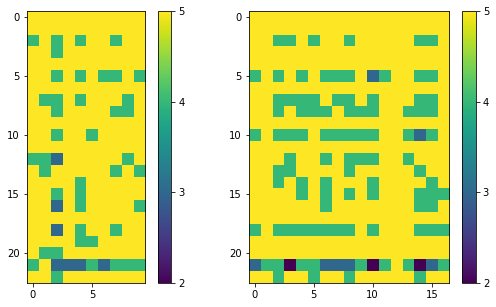

In [ ]:
first_year, first_columns = getYear(df, 2018)
second_year, second_columns = getYear(df, 2019)

import matplotlib.pyplot as plt
plt.figure(0, figsize = [10, 5])
plt.subplot(121)
plt.imshow(first_year, vmin=2, vmax=5)
plt.colorbar(ticks=[2, 3, 4, 5])
plt.subplot(122)
plt.imshow(second_year, vmin=2, vmax=5)
plt.colorbar(ticks=[2, 3, 4, 5])

a probe of the neural network

In [ ]:
pip install neurolab

     |████████████████████████████████| 645 kB 4.3 MB/s 
  Created wheel for neurolab: filename=neurolab-0.3.5-py3-none-any.whl size=22179 sha256=0fa8a7d5aff17f0c6414717373e532656eb4fb99c8ae6bf76518db92c149f420
  Stored in directory: /root/.cache/pip/wheels/3e/07/63/e3d6e066089d7186465184a6f9a1884471485f38beef1edeaa
Successfully built neurolab


# Single layer

Epoch: 10; Error: 29.0;
Epoch: 20; Error: 36.5;
Epoch: 30; Error: 29.5;
Epoch: 40; Error: 33.5;
Epoch: 50; Error: 29.0;
Epoch: 60; Error: 27.0;
Epoch: 70; Error: 29.0;
Epoch: 80; Error: 27.0;
Epoch: 90; Error: 27.5;
Epoch: 100; Error: 28.0;
The maximum number of train epochs is reached


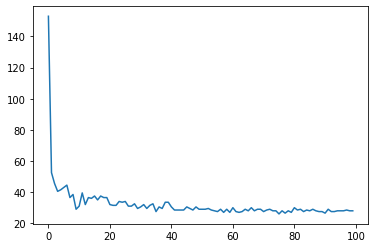

In [ ]:
first_year, first_columns = getYear(df, 2018)
second_year, second_columns = getYear(df, 2019)

shift = 4
inp = first_year-shift
tar = second_year[:, :]-shift

#inp = [[0, 0], [0, 1], [1, 0], [1, 1]]
#tar = [[1, 1], [1, 0], [0, 1], [0, 0]]

import neurolab as nl
full_data = np.hstack((inp, tar))
minmax = [[np.min(full_data), np.max(full_data)]]*np.size(inp, 1)
neurons = np.size(tar, 1)

# single layer
net = nl.net.newp(minmax, neurons)
error = net.train(inp, tar, epochs=100, show=10, lr=0.1)


import matplotlib.pyplot as plt

plt.plot(error)

test example

In [ ]:
#net.sim([[0, 0]])

Test my data

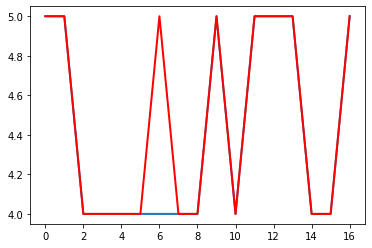

In [ ]:
s = 7 #student number
x = first_year[s,:]-shift
net_output = np.round(net.sim([x.tolist()]))
real_output = tar[s, :]

plt.plot(net_output.squeeze()+shift, linewidth = 2)
plt.plot(real_output+shift, linewidth = 2, color = 'red')

# Multilayer

In [ ]:
# my data
first_year, first_columns = getYear(df, 2018)
second_year, second_columns = getYear(df, 2019)

shift = 4
inp = first_year-shift
tar = second_year[:, :]-shift

# example data
#inp = [[0, 0], [0, 1], [1, 0], [1, 1]]
#tar = [[1, 1], [1, 0], [0, 1], [0, 0]]

full_data = np.hstack((inp, tar))
minmax = [[np.min(full_data), np.max(full_data)]]*np.size(inp, 1)
neurons = np.size(tar, 1)

net = nl.net.newff(minmax,[10,neurons])
error = net.train(inp, tar, epochs=100, show=10, goal=0.02)

Epoch: 10; Error: 44.31564178674931;
Epoch: 20; Error: 33.421659983603085;
Epoch: 30; Error: 25.922451320996267;
Epoch: 40; Error: 19.932950137473775;
Epoch: 50; Error: 16.61843070694246;
Epoch: 60; Error: 12.902561369143156;
Epoch: 70; Error: 9.437687505390075;
Epoch: 80; Error: 8.24800470104546;
Epoch: 90; Error: 6.907789638470351;
Epoch: 100; Error: 5.6933493660686505;
The maximum number of train epochs is reached


test example

In [ ]:
#np.round(net.sim([[1, 0]]))

test my data

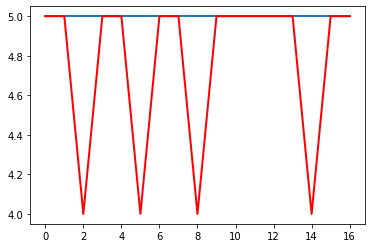

In [ ]:
s = 22
 #student number
x = first_year[s,:]-shift
net_output = np.round(net.sim([x.tolist()]))
real_output = tar[s, :]


plt.plot(net_output.squeeze()+shift, linewidth = 2)
plt.plot(real_output+shift, linewidth = 2, color = 'red')

# Multi-layer perceptron + regression coefficients

In [ ]:
def regressGrades(first_year, second_year):
  noise = np.random.rand(1)*0.1
  ouput_size = np.size(second_year, 1)
  input_size = np.size(first_year, 1)
  R2 = [];
  for j in range(ouput_size): # output index 
    R1 = [];  
    for i in range(input_size):  # input index
      r = np.corrcoef(first_year[:, i], second_year[:, j]+noise)      
      R1.append(r[0, 1])
    R2.append(R1);
  return np.array(R2)

def predictGrades(grades_in, R2):
  from numpy.linalg import norm
  ouput_size = np.size(R2, 0)
  G = [];
  for j in range(ouput_size):
    R = R2[j]
    R[R<0] = 0# avoid negative correlation
    grade_out = norm(R*grades_in)/norm(R)
    G.append(grade_out)
  return np.array(G)

def miniNet(inp, tar):
  full_data = np.hstack((inp, tar))
  minmax = [[np.min(full_data), np.max(full_data)]]*np.size(inp, 1)
  neurons = np.size(tar, 1)

  net = nl.net.newff(minmax,[10,neurons])
  error = net.train(inp, tar, epochs=100, show=10, goal=0.02)
  return net

In [ ]:
first_year, first_columns = getYear(df, 2018)
second_year, second_columns = getYear(df, 2019)

shift = 4
inp = first_year-shift
tar = second_year-shift

# regression coefficients
R2 = regressGrades(first_year, second_year)

# Multi-layer perceptron
net = miniNet(inp, tar)

Epoch: 10; Error: 35.169854846480554;
Epoch: 20; Error: 25.391747394028936;
Epoch: 30; Error: 21.03957274933497;
Epoch: 40; Error: 14.212161068868891;
Epoch: 50; Error: 12.458895845939931;
Epoch: 60; Error: 11.359678804853623;
Epoch: 70; Error: 10.573275113692821;
Epoch: 80; Error: 10.152485051429629;
Epoch: 90; Error: 9.936391651641657;
Epoch: 100; Error: 9.80686846230131;
The maximum number of train epochs is reached


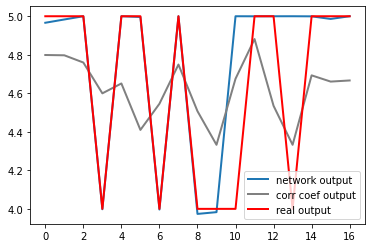

In [ ]:
s = 12 #student number

grades_in = first_year[s]

x = grades_in-shift
net_output = net.sim([x.tolist()]).squeeze()+shift
cor_output = predictGrades(grades_in, R2)

real_output = tar[s, :]

plt.plot(net_output, linewidth = 2, label = 'network output')
plt.plot(cor_output, linewidth = 2, color = 'gray', label = 'corr coef output')
plt.plot(real_output+shift, linewidth = 2, color = 'red', label = 'real output')
plt.legend()

Find what grades are troublesome (the same for NN and the regression model and less than 5)

In [ ]:
def getAdvice(net_output, cor_output, R2):

  # make them comparable by rounding to the same scale
  net_out_round = np.around(net_output)
  cor_out_round = np.around(cor_output)
  same_grades = [net_out_round == cor_out_round]
  less_than_needed = net_out_round < np.median(net_out_round)
  troublesome_grades = same_grades and less_than_needed
  net_out_round[troublesome_grades], troublesome_grades
  troublesome_index = np.where(troublesome_grades)[0]

  # what grades from the previous year cause these troubles?
  signigicant_previous_index = np.unique([np.argmax(R2[tr, :]) for tr in troublesome_index])
  return signigicant_previous_index

getAdvice(net_output, cor_output, R2)

array([2, 3, 7, 8])

# Learning Function
get learning coefficients from a dataset

In [ ]:
import io
import pickle

def learnFromFile(filepath):
  df = pd.read_excel(filepath, skiprows = 0)
  df.columns = df.columns.astype(str)# make all columns as str

  # get years
  columns = df.columns.to_numpy().astype(str)
  years = np.unique([int(columns[i][0:4]) for i in range(1, np.size(columns))])
  print('learning...')
  N = []
  R = []
  previous_grades = []
  for i in range(np.size(years)-1):
    current_year = years[i]
    next_year = years[i+1]
    current_year_grades ,_ = getYear(df, current_year)
    next_year_grades ,_ = getYear(df, next_year)
    if i >0:
      previous_grades = np.concatenate((previous_grades, current_year_grades), 1)
    else:
      previous_grades = current_year_grades.copy()
    # regression coefficients
    r = regressGrades(previous_grades, next_year_grades)
    nan_cond = np.where(np.isnan(r))
    r[nan_cond] = 0
    print(np.shape(previous_grades), np.shape(current_year_grades))
    # Multi-layer perceptron
    shift = 4
    inp = previous_grades-shift
    tar = next_year_grades-shift
    net = miniNet(inp, tar)
    #print(current_year_grades, next_year_grades, r, current_year)
    R.append(r)
    N.append(net)
  return R, N

filepath = '/content/StudentNeuralNetwork/example_dataset_v2.xlsx'
R, N = learnFromFile(filepath)
pickle.dump( R, open( "/content/StudentNeuralNetwork/R.p", "wb" ) )
pickle.dump( N, open( "/content/StudentNeuralNetwork/N.p", "wb" ) )
#print(np.shape(np.asarray(R)), np.shape(np.array(prediction_rates)))
#print(R, 'R')
#print('-----')
#print(prediction_rates)

learning...
(23, 10) (23, 10)
Epoch: 10; Error: 70.82037202073923;
Epoch: 20; Error: 31.903897547827306;
Epoch: 30; Error: 22.444297232221217;
Epoch: 40; Error: 17.704845642497503;
Epoch: 50; Error: 14.165987615014556;
Epoch: 60; Error: 12.549369389594826;
Epoch: 70; Error: 11.081118743069716;
Epoch: 80; Error: 10.27988287922397;
Epoch: 90; Error: 9.582407763455333;
Epoch: 100; Error: 9.159103395962493;
The maximum number of train epochs is reached


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


(23, 27) (23, 17)
Epoch: 10; Error: 118.35046168481698;
Epoch: 20; Error: 79.51300241500913;
Epoch: 30; Error: 67.62941389973815;
Epoch: 40; Error: 60.60209059760444;
Epoch: 50; Error: 51.56314547275448;
Epoch: 60; Error: 43.83442469284258;
Epoch: 70; Error: 36.43038611437847;
Epoch: 80; Error: 31.502135987455134;
Epoch: 90; Error: 27.62844804404088;
Epoch: 100; Error: 23.693266359647566;
The maximum number of train epochs is reached
(23, 68) (23, 41)
Epoch: 10; Error: 15.451358742540297;
Epoch: 20; Error: 8.535385540781007;
Epoch: 30; Error: 3.5910554389188762;
Epoch: 40; Error: 2.396984077410589;
Epoch: 50; Error: 1.7576407464136548;
Epoch: 60; Error: 1.579496650654904;
Epoch: 70; Error: 1.5081590470721529;
Epoch: 80; Error: 1.5014969996844734;
Epoch: 90; Error: 1.5002250598063227;
Epoch: 100; Error: 1.500128486132182;
The maximum number of train epochs is reached


# Prediction Function 
predict trajectory using file with grades

In [ ]:
def predictByFile(filepath, prediction_rates, neural_networks):
    st_df = pd.read_excel(filepath, skiprows = 0)# read student's data
    st_df.drop(st_df.columns[[0]], axis=1, inplace=True)
    st_df.columns = st_df.columns.astype(str)# make all columns as str

    # get years
    columns = st_df.columns.to_numpy().astype(str)
    years = np.unique([int(columns[i][0:4]) for i in range(np.size(columns))])  
    years = np.delete(years, -1) # we don't need the last year    

    overal_grades = [];
    subjects_to_improve = pd.DataFrame([])
    for i in range(np.size(years)):
        year = years[i]
        R = prediction_rates[i]# current 'regression coefficients'
        net = neural_networks[i]# current neural network

        # get grades  
        spike_cols = [col for col in st_df.columns if str(year) in col]
        data_out = st_df[spike_cols].to_numpy()[0, :].astype(float)    
        current_year_grades = data_out.copy()

        if i > 0:
          # remove nan values by previously predicted grades
          nan_cond = np.where(np.isnan(current_year_grades))
          current_year_grades[nan_cond] = net_output[nan_cond]  

        # concatenate all grades for the next prediction
        overal_grades = np.concatenate((overal_grades, current_year_grades))

        # predict the next year
        cor_output = predictGrades(overal_grades, R) 
        #print(predicted_grades, ' - predicted') 
        shift = 4
        x = overal_grades-shift
        net_output = (net.sim([x.tolist()])+shift).squeeze()

        final_grades = np.concatenate((overal_grades, net_output))
        final_columns = st_df.columns

        advised_index = getAdvice(net_output, cor_output, R)
        advised_subjects = pd.DataFrame(final_columns[advised_index.astype(int)].tolist())
        subjects_to_improve = pd.concat([subjects_to_improve,advised_subjects], ignore_index=True, axis=1)
    subjects_to_improve.insert(0, "subjects to improve", np.nan*subjects_to_improve.shape[0])    
    st_df.loc['predicted'] = final_grades  
    return st_df, subjects_to_improve

R = pickle.load( open( "/content/StudentNeuralNetwork/R.p", "rb" ) )
N = pickle.load( open( "/content/StudentNeuralNetwork/N.p", "rb" ) )
filepath = '/content/StudentNeuralNetwork/student_data_in_v2.xlsx'
st_df, subjects_to_improve = predictByFile(filepath, R, N)

subjects_to_improve.to_excel('subjects_to_improve.xlsx')
subjects_to_improve

,subjects to improve,0,1,2
0,NaN,"2018,Высшая математика","2018,Физика","2019,Электрические цепи и электротехнические у..."
1,NaN,"2018,Иностранный язык","2018,Высшая математика","2019,Тепловая и ядерная энергетика"
2,NaN,"2018,Информационные и компьютерные технологии","2018,Иностранный язык","2020,Электроснабжение"
3,NaN,"2018,Технологии самообразования и самоорганизации","2018,Информационные и компьютерные технологии",NaN
4,NaN,"2018,Русский язык и культура речи","2018,Технологии самообразования и самоорганизации",NaN
5,NaN,NaN,"2019,Безопасность жизнедеятельности",NaN
6,NaN,NaN,"2019,Теоретическая механика",NaN
7,NaN,NaN,"2019,Специальные разделы математики",NaN
8,NaN,NaN,"2019,Теоретические основы электротехники 1",NaN
9,NaN,NaN,"2019,Теоретические основы электротехники 2",NaN


In [ ]:
subjects_to_improve.shape[0]

14

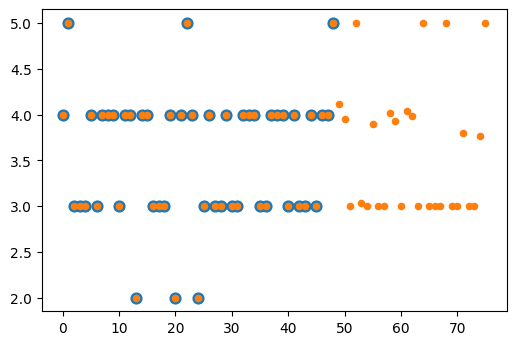

In [ ]:
import matplotlib.pyplot as plt
subjects = list(range(np.size(st_df, 1)))
plt.figure(0, dpi = 100)
plt.scatter(subjects, st_df.loc[0], 60)
plt.scatter(subjects, st_df.loc['predicted'], 20)